In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv("housing_test.csv",sep='\t')
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


# EDA for Test Data

In [3]:
df.shape # checking no of columns and rows

(292, 80)

In [4]:
df.columns # checking all the column names 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.describe() # getting the description of the dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
count,292.000000,292.000000,247.000000,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,292.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,292.0,0.0,292.000000,292.000000,292.000000
mean,755.955479,57.414384,66.425101,10645.143836,6.078767,5.493151,1972.616438,1985.294521,109.171821,439.294521,...,86.397260,47.061644,17.708904,2.489726,15.099315,0.0,NaN,28.184932,6.232877,2007.859589
std,442.565228,43.780649,21.726343,13330.669795,1.356147,1.063267,30.447016,20.105792,175.030021,429.559675,...,121.898836,65.865449,51.892906,30.247488,58.483473,0.0,NaN,224.036218,2.774556,1.322867
min,6.000000,20.000000,21.000000,1526.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,1.000000,2006.000000
25%,377.750000,20.000000,53.500000,7200.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,4.000000,2007.000000
50%,778.000000,50.000000,65.000000,9200.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,369.500000,...,0.000000,28.500000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,6.000000,2008.000000
75%,1152.250000,70.000000,79.000000,11658.750000,7.000000,6.000000,2001.000000,2003.250000,180.000000,700.500000,...,149.250000,66.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,8.000000,2009.000000
max,1456.000000,190.000000,150.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1031.000000,1767.000000,...,728.000000,418.000000,330.000000,407.000000,396.000000,0.0,NaN,3500.000000,12.000000,2010.000000


key observations here

1. mean and median in  columns like LotArea , MasVnrArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal are hugely different.
2. There is big differnece in 75% and max values in WoodDeckSF,OpenPorchSF,EnclosedPorch, 3SsnPorch,ScreenPorch, MiscVal,BsmtFinSF1,MasVnrArea.
3. That means few outliers are there

In [6]:
df.dtypes #checking the datatypes of variables

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object

In [7]:
df.isnull().sum() # checking the null values 

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

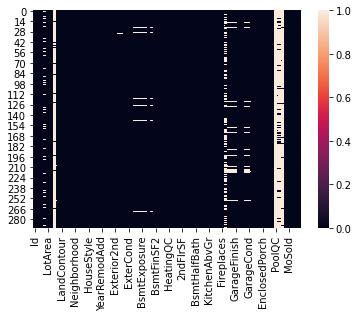

In [8]:
sns.heatmap(df.isnull()) # visualizing null values 

#### There are null values in variuos columns like fireplaces , garagefinish etc

In [9]:
dff=df.columns[df.isnull().any()] # extracting all the variables having null values 
dff

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

# Data cleaning process

1. dropping of column if having no positive correlation.

2. filling the null values in with suitable values .

3. change nominal values to numerical values.

4. After that, Removing of outliers if reqd.

In [10]:
df.LotFrontage.unique()

array([ 86.,  nan,  75.,  21.,  35., 107.,  32.,  60., 100.,  50., 110.,
        70.,  44.,  71.,  52.,  37.,  62.,  78.,  90.,  68.,  67.,  80.,
        76.,  24.,  57.,  30.,  34.,  55.,  79.,  63.,  98.,  36.,  59.,
        66.,  91.,  85.,  64.,  72.,  43.,  74., 102.,  56.,  83.,  77.,
       120.,  73.,  48.,  93.,  92.,  58.,  40.,  33.,  47.,  51., 138.,
       124.,  42.,  89., 105.,  65.,  45.,  61., 137.,  96., 150.,  69.])

#### replacing NaN value of LotFrontage with mean value

In [11]:
df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)

In [12]:
df.Alley.value_counts()

Grvl    9
Pave    5
Name: Alley, dtype: int64

#### replacing nan value with "No Alley Access"

In [13]:
df['Alley'].fillna(value='No Alley Access', inplace=True)

In [14]:
df.MasVnrType.unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn'], dtype=object)

#### replacing nan value with "None" value

In [15]:
df['MasVnrType'].fillna(value='None', inplace=True)

In [16]:
df.MasVnrArea.unique()

array([ 200.,    0.,   74.,   80.,  436.,  145.,  320.,  226.,  375.,
        218.,  148.,  196.,  420.,   nan,  387.,  105.,  268.,  473.,
        166.,  340.,  921.,  248.,   44.,  170.,  146.,  180.,  337.,
        541.,  361.,  255.,   16.,  188.,  108.,  650.,  360.,  579.,
        298.,  116.,   32.,  149.,   95.,  318.,   94.,   42.,  328.,
        480.,  240.,  294.,  603., 1031.,  101.,   76.,  359.,  513.,
        106.,  132.,   92.,  284.,  664.,  274.,  378.,  312.,  153.,
        281.,  171.,  219.,  425.,   24.,  368.,  147.,  297.,  530.,
         60.,  207.,  175.,   50.,  169.,  270.,  252.,  183.,  562.,
        584.,   97.,   90.,  632.,  136.,   54.,  293.,  621.,  142.,
        450.,  209.,  120.,  442.,  456.,   72.,  230.,  236.,  266.,
         38.,  162.,  176.,  272.,  468.,  408.])

#### replacing the nan with '0'

In [17]:
df['MasVnrArea'].fillna(value=0, inplace=True)

In [18]:
df.BsmtQual.unique()

array(['Ex', 'Gd', 'TA', nan, 'Fa'], dtype=object)

#### replacing nan value with No basement

In [19]:
df['BsmtQual'].fillna(value='No basement', inplace=True)

In [20]:
df.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa'], dtype=object)

#### replacing the nan with "No basement"

In [21]:
df['BsmtCond'].fillna(value='No basement', inplace=True)

In [22]:
df.BsmtExposure.unique()

array(['Gd', 'Av', 'No', 'Mn', nan], dtype=object)

#### replacing the nan with "No basement"

In [23]:
df['BsmtExposure'].fillna(value='No basement', inplace=True)

In [24]:
df.BsmtFinType1.unique()

array(['GLQ', 'Unf', 'Rec', 'BLQ', 'ALQ', nan, 'LwQ'], dtype=object)

#### replacing the nan with "No basement"

In [25]:
df['BsmtFinType1'].fillna(value='No basement', inplace=True)

In [26]:
df.BsmtFinType2.unique()

array(['Unf', 'GLQ', 'Rec', 'BLQ', 'LwQ', nan, 'ALQ'], dtype=object)

#### replacing the nan with "No basement"

In [27]:
df['BsmtFinType2'].fillna(value='No basement', inplace=True)

In [28]:
df.Electrical.unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

#### replacing the nan with "Mixed"

In [29]:
df['Electrical'].fillna(value='Mixed', inplace=True)

In [30]:
df.FireplaceQu.unique()

array(['Gd', 'Ex', 'TA', nan, 'Fa', 'Po'], dtype=object)

#### replacing the nan with "No Fireplace"

In [31]:
df['FireplaceQu'].fillna(value='No Fireplace', inplace=True)

In [32]:
df.GarageType.unique()

array(['Attchd', 'BuiltIn', nan, 'Basment', 'Detchd', '2Types', 'CarPort'],
      dtype=object)

#### replacing the nan with "No Garage"

In [33]:
df['GarageType'].fillna(value='No Garage', inplace=True)

In [34]:
df.GarageYrBlt.unique()

array([2005., 1984., 2001., 1941., 2007.,   nan, 1989., 1998., 1920.,
       1970., 1954., 1963., 2006., 1978., 1964., 1999., 1987., 1930.,
       1977., 1967., 1925., 1968., 1922., 2003., 2004., 1957., 1924.,
       2000., 1994., 1972., 1948., 1959., 1965., 2008., 1979., 1926.,
       1996., 1973., 1976., 1992., 1958., 1960., 2002., 1950., 1928.,
       1980., 1953., 1962., 1951., 1940., 1990., 1988., 1955., 1956.,
       1949., 1931., 2009., 1975., 1997., 1966., 1993., 1939., 1969.,
       1971., 1916., 1974., 1982., 1991., 2010., 1938., 1995., 1985.])

#### replacing the nan values with median

In [35]:
df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].median(), inplace=True)

In [36]:
df.GarageQual.unique()

array(['TA', nan, 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

#### replacing the nan values with "No Garage"

In [37]:
df['GarageQual'].fillna(value='No Garage', inplace=True)

In [38]:
df.GarageFinish.unique()

array(['Fin', 'RFn', 'Unf', nan], dtype=object)

#### replacing the nan values with "No Garage"

In [39]:
df['GarageFinish'].fillna(value='No Garage', inplace=True)

In [40]:
df.GarageCond.unique()

array(['TA', nan, 'Fa', 'Po', 'Ex', 'Gd'], dtype=object)

#### replacing the nan values with "No Garage"

In [41]:
df['GarageCond'].fillna(value='No Garage', inplace=True)

In [42]:
df.PoolQC.unique()

array([nan])

#### replacing the nan values with "No Pool"

In [43]:
df['PoolQC'].fillna(value='No Pool', inplace=True)

In [44]:
df.Fence.unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

#### replacing the nan values with "No Fence"

In [45]:
df['Fence'].fillna(value='No Fence', inplace=True)

In [46]:
df.MiscFeature.unique()

array([nan, 'Othr', 'Shed'], dtype=object)

#### replacing the nan values with "None"

In [47]:
df['MiscFeature'].fillna(value='None', inplace=True)

In [48]:
dfcor=df.corr()
dfcor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.035247,-0.016505,-0.045497,0.005823,-0.089945,-0.000174,-0.036955,-0.013197,-0.040462,...,0.052191,-0.033619,0.049117,-0.000275,-0.134738,-0.012348,NaN,-0.073024,0.015132,0.034579
MSSubClass,0.035247,1.000000,-0.454786,-0.186654,-0.116077,-0.068113,0.041932,-0.023317,0.004589,-0.142908,...,-0.122536,0.028190,-0.097449,-0.047570,-0.045672,-0.072139,NaN,0.137542,-0.004079,0.044441
LotFrontage,-0.016505,-0.454786,1.000000,0.370091,0.254760,-0.096571,0.146961,0.056610,0.135967,0.152566,...,0.317132,0.006654,0.075946,-0.060176,0.111523,0.068553,NaN,0.031567,-0.045333,0.059745
LotArea,-0.045497,-0.186654,0.370091,1.000000,0.109161,-0.071113,0.037757,-0.022957,0.062992,0.209632,...,0.152737,0.059117,0.067269,-0.055667,0.007832,0.090367,NaN,-0.020398,-0.034709,0.041735
OverallQual,0.005823,-0.116077,0.254760,0.109161,1.000000,-0.131891,0.560092,0.528983,0.422236,0.328421,...,0.542729,0.288506,0.175569,-0.195240,-0.031605,0.086383,NaN,-0.099852,-0.008545,0.061736
OverallCond,-0.089945,-0.068113,-0.096571,-0.071113,-0.131891,1.000000,-0.366830,0.045747,-0.081386,-0.126968,...,-0.269860,-0.078167,-0.065010,0.137325,-0.038308,-0.003167,NaN,0.019495,-0.043722,-0.001908
YearBuilt,-0.000174,0.041932,0.146961,0.037757,0.560092,-0.366830,1.000000,0.593138,0.281914,0.343374,...,0.508563,0.311878,0.179072,-0.457897,0.011253,-0.019113,NaN,-0.085967,-0.060201,-0.014054
YearRemodAdd,-0.036955,-0.023317,0.056610,-0.022957,0.528983,0.045747,0.593138,1.000000,0.166959,0.191460,...,0.306892,0.243722,0.174213,-0.196420,-0.031424,-0.009695,NaN,-0.103391,0.009670,0.045230
MasVnrArea,-0.013197,0.004589,0.135967,0.062992,0.422236,-0.081386,0.281914,0.166959,1.000000,0.252429,...,0.406741,0.197345,0.099890,-0.147696,0.020538,0.121057,NaN,-0.059616,-0.084064,0.010916
BsmtFinSF1,-0.040462,-0.142908,0.152566,0.209632,0.328421,-0.126968,0.343374,0.191460,0.252429,1.000000,...,0.344441,0.254996,0.124929,-0.209330,0.030231,0.178546,NaN,-0.045842,-0.113279,0.052788


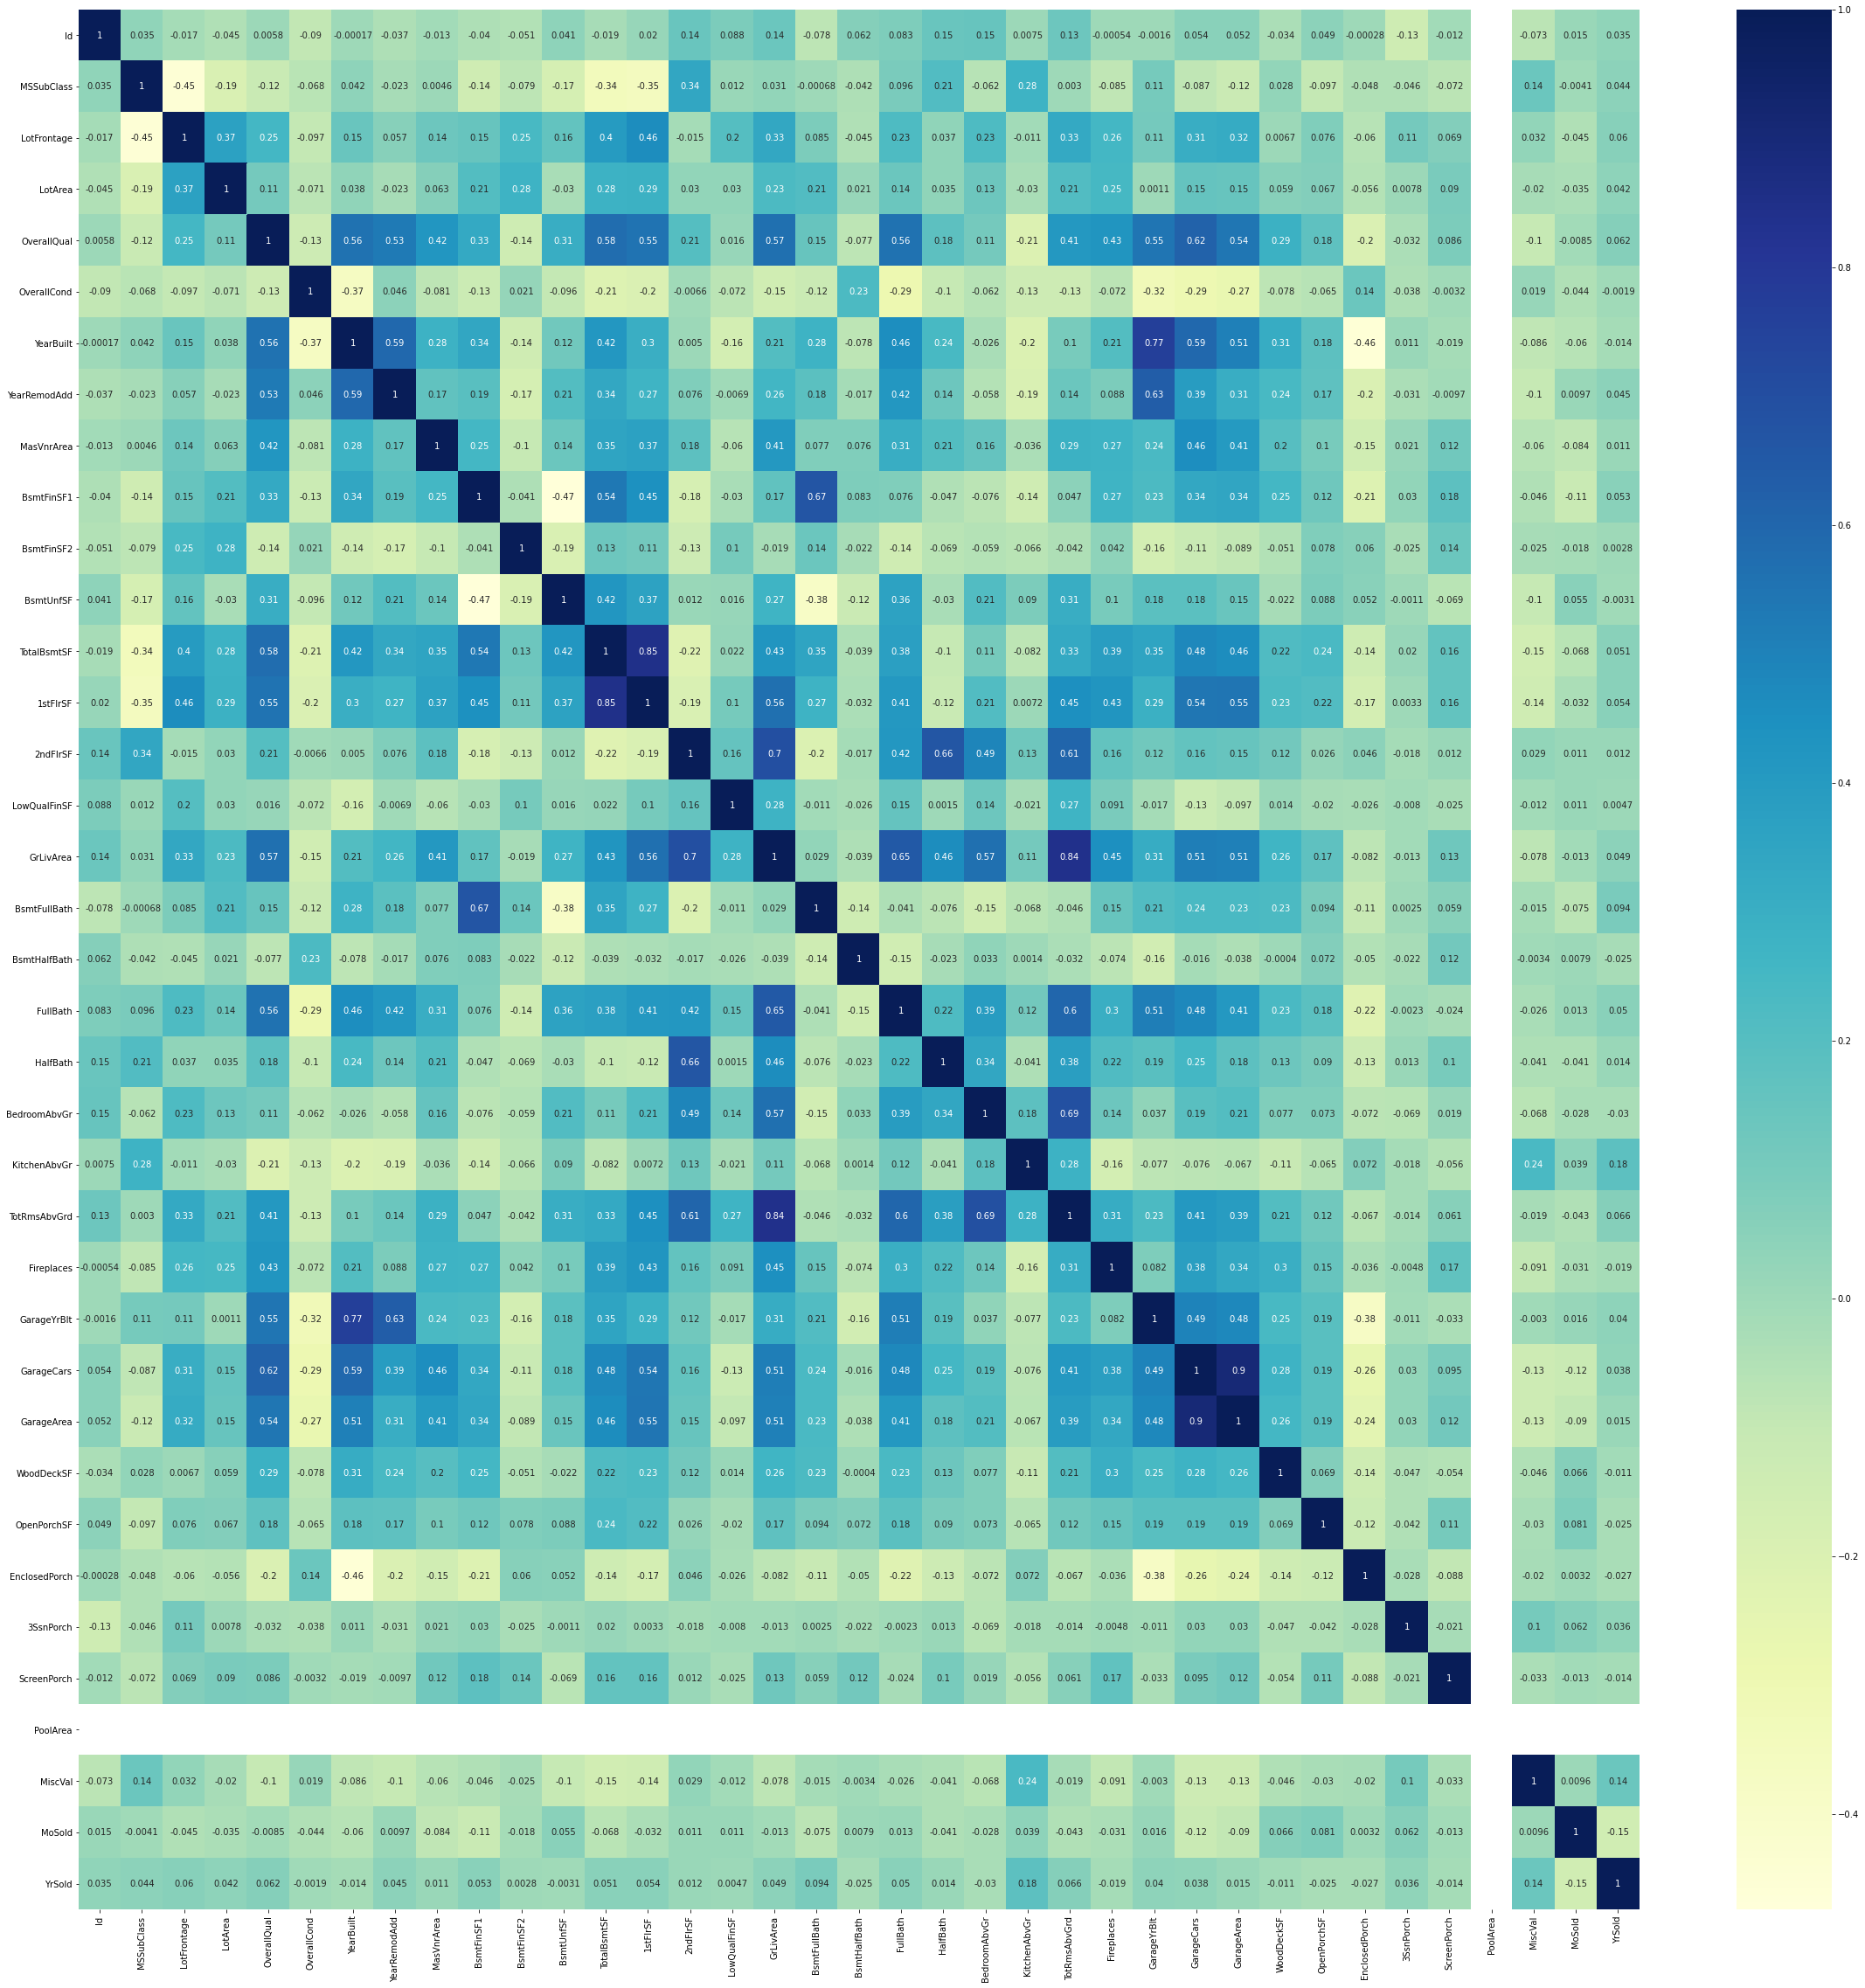

In [49]:
plt.figure(figsize=(40,40)) 
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

### key observations here
1. GarageArea and yearbuilt are highly correlated with each other.
2. GarageYrBlt,GarageCars,GarageArea are highly correlated with each other.
3. TotalBsmtSF,1stFlrSF are highly correlated with  each other .
4. EnclosedPorch, yearbuilt and MSSubClass,LotFrontage and BsmtUnfSF,BsmtFinSF1 are negatively correlated .
5. other misc columns which have color from light blue to dark blue are highly correlated. and colors below light blue are negatively correlated. 

In [50]:
# checking for the count of unique values in each column
for i in df.columns:
    print("Count of unique values of  ", i, "is " , df[i].nunique())

Count of unique values of   Id is  292
Count of unique values of   MSSubClass is  15
Count of unique values of   MSZoning is  4
Count of unique values of   LotFrontage is  66
Count of unique values of   LotArea is  249
Count of unique values of   Street is  2
Count of unique values of   Alley is  3
Count of unique values of   LotShape is  4
Count of unique values of   LandContour is  4
Count of unique values of   Utilities is  2
Count of unique values of   LotConfig is  5
Count of unique values of   LandSlope is  3
Count of unique values of   Neighborhood is  24
Count of unique values of   Condition1 is  8
Count of unique values of   Condition2 is  2
Count of unique values of   BldgType is  5
Count of unique values of   HouseStyle is  8
Count of unique values of   OverallQual is  8
Count of unique values of   OverallCond is  7
Count of unique values of   YearBuilt is  84
Count of unique values of   YearRemodAdd is  57
Count of unique values of   RoofStyle is  5
Count of unique values o

In [51]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

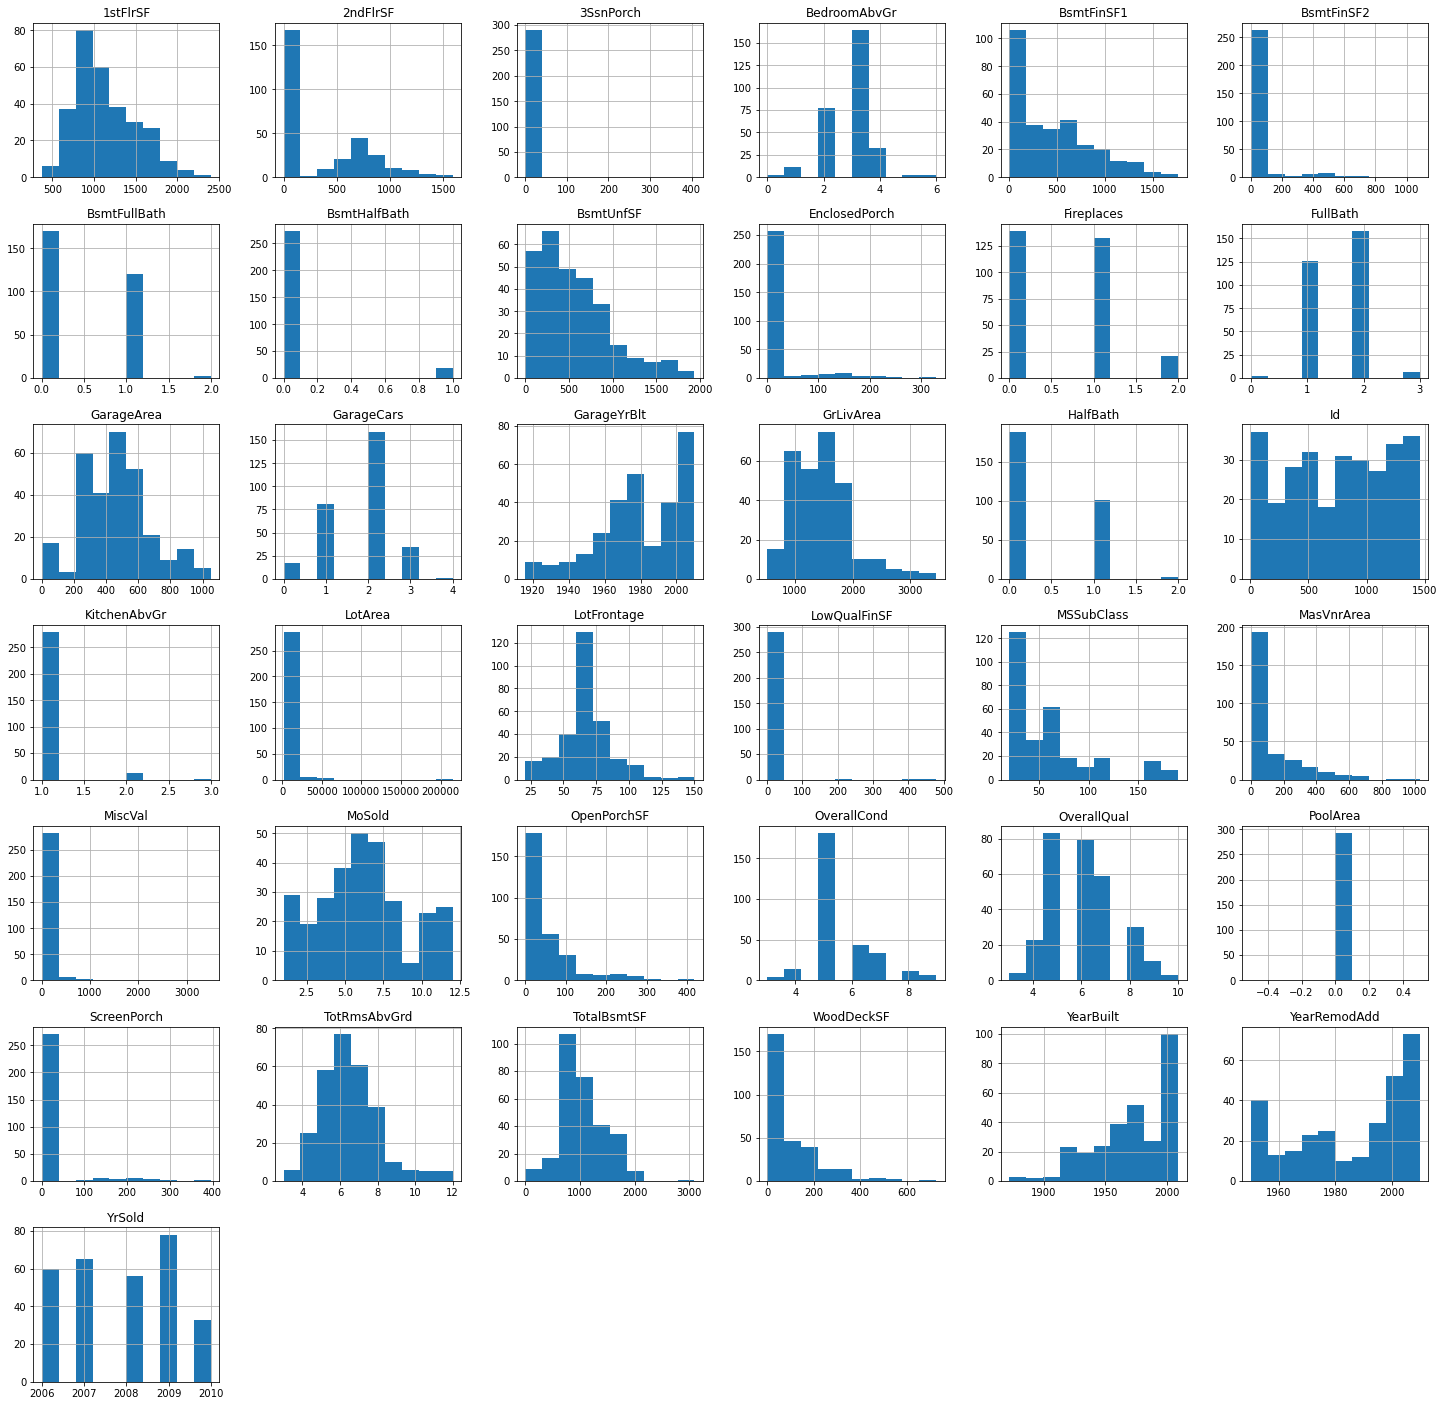

In [52]:
df.hist(figsize=(25,25))
plt.show()

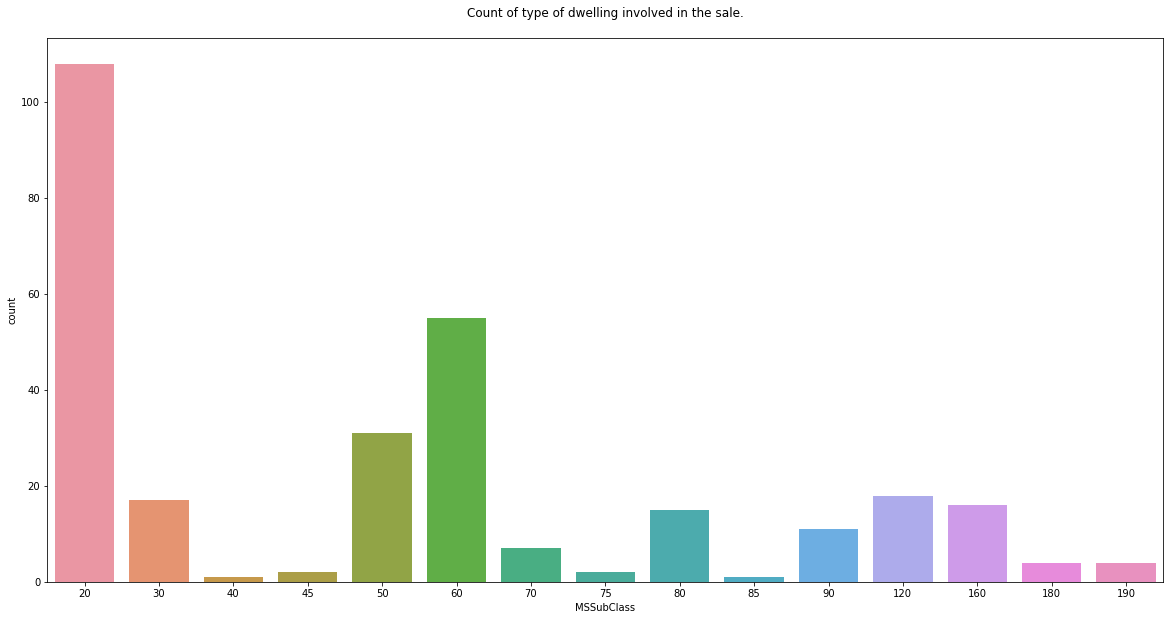

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(df["MSSubClass"])
plt.title("Count of type of dwelling involved in the sale.\n ")
plt.show() 

#### Above countplot shows that 
1. 1 storey 1946 and newer all styles are maximum which are in sale.
2. 1-STORY W/FINISHED ATTIC ALL AGES and SPLIT FOYER are least ones which are in sale.

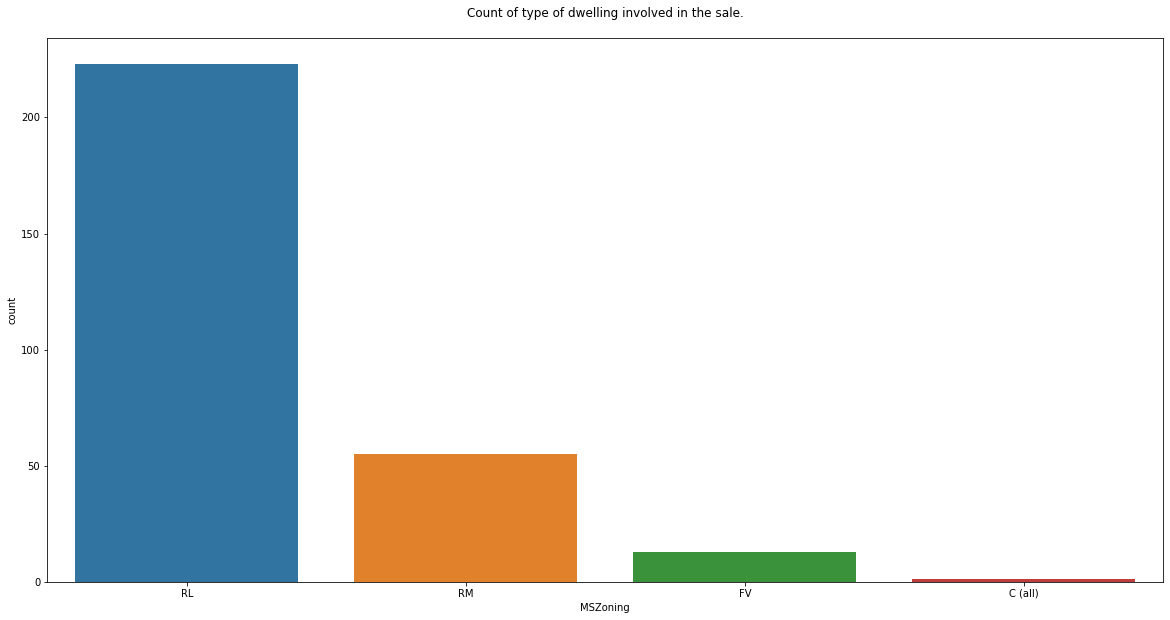

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(df["MSZoning"])
plt.title("Count of type of dwelling involved in the sale.\n ")
plt.show() 

#### Above countplot shows that Residential Low Density property is maximum on sale. and Commercial is least on sale.

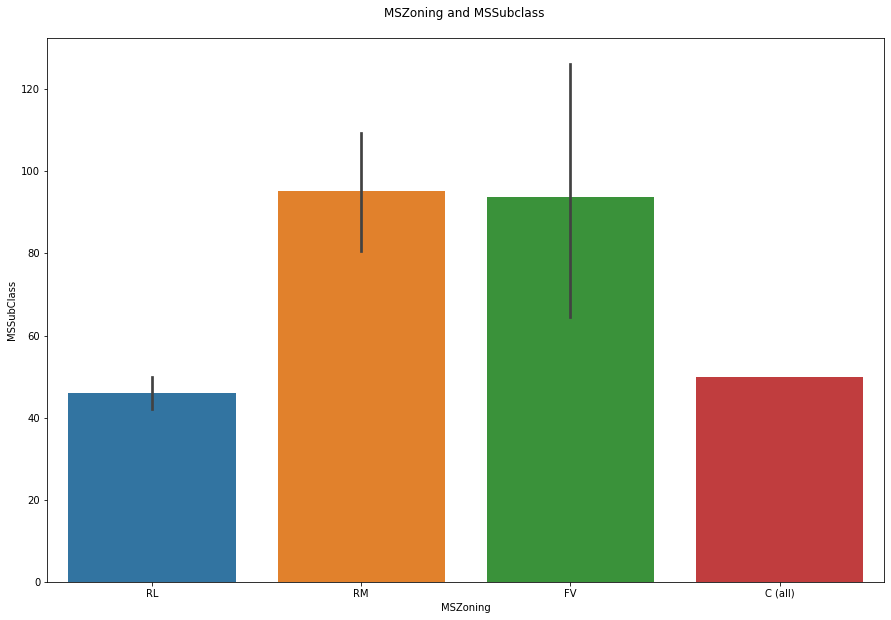

In [55]:
plt.figure(figsize=(15, 10))
sns.barplot(x='MSZoning',y='MSSubClass',data=df)
plt.title("MSZoning and MSSubclass \n")
plt.show()

#### Above countplot shows Maximum dwelling involved in sale are "DUPLEX - ALL STYLES AND AGES" having general zoning classification as "Residential Medium Density"

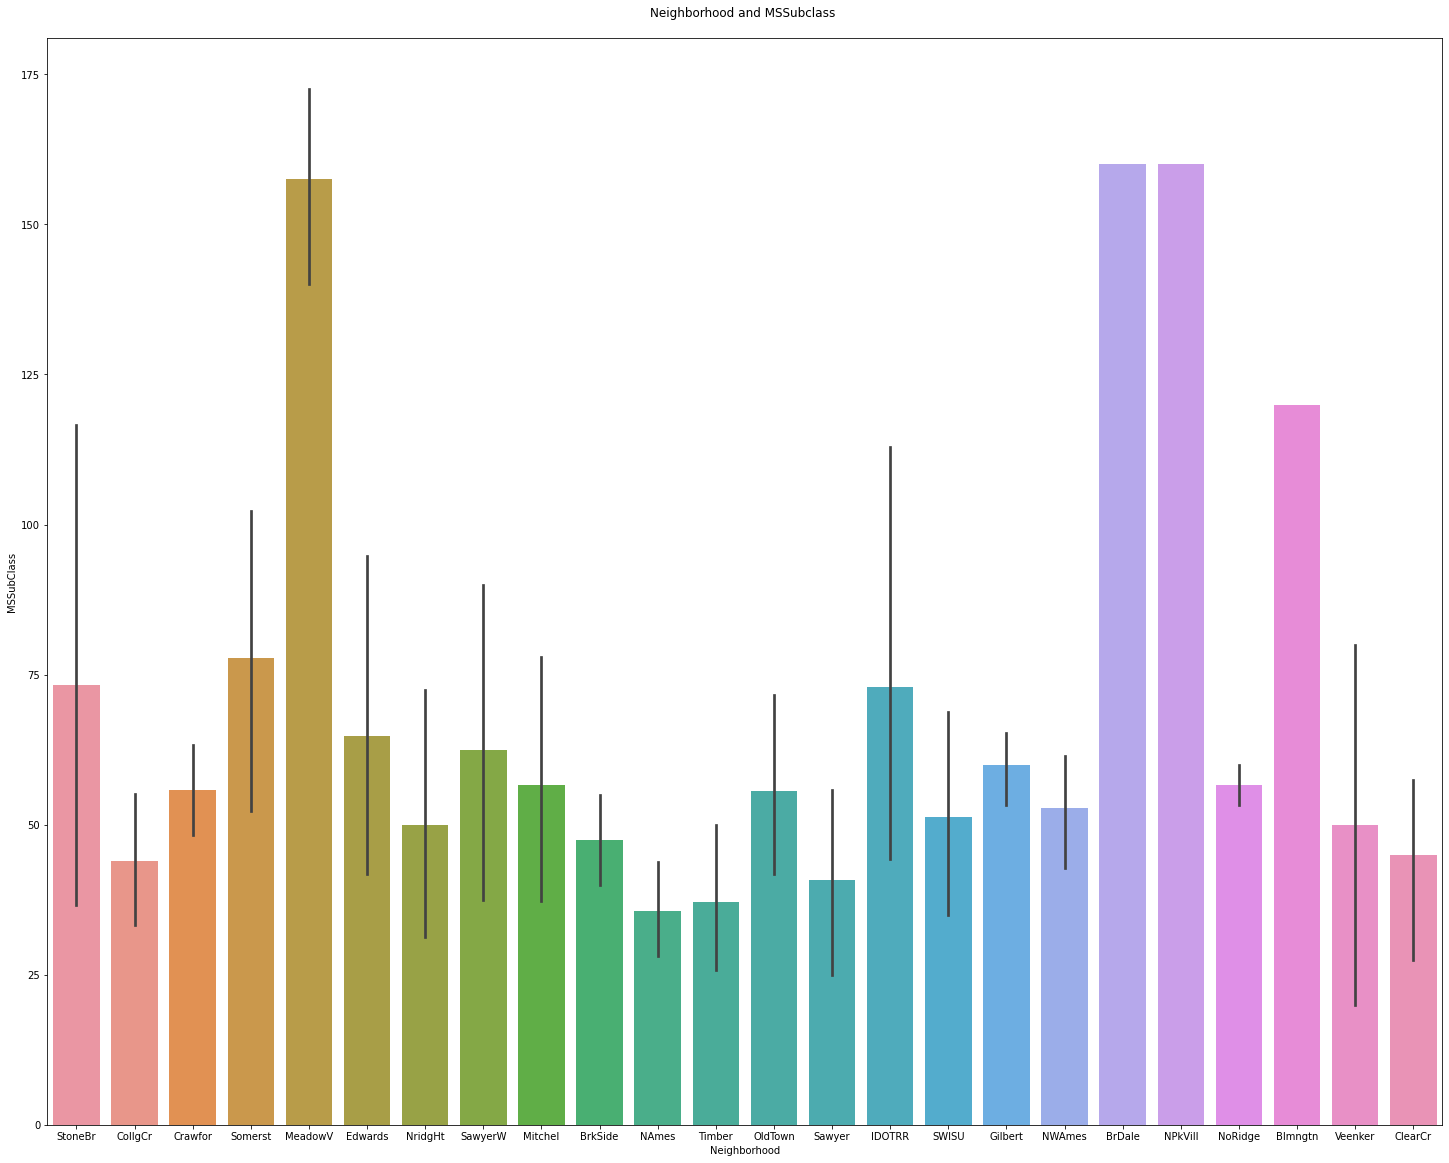

In [56]:
plt.figure(figsize=(25, 20))
sns.barplot(x='Neighborhood',y='MSSubClass',data=df)
plt.title("Neighborhood and MSSubclass \n")
plt.show()

#### above barplot shows the neighbourhood of all MSSubclass dwelling involved in sale. like "Meadow Village" is in neighbourhood of "2-STORY PUD - 1946 & NEWER"

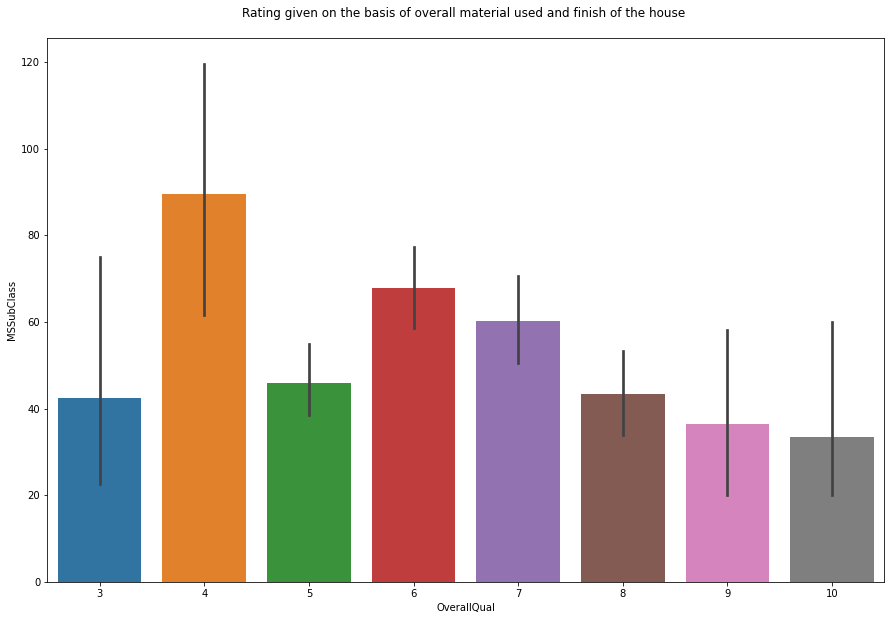

In [57]:

plt.figure(figsize=(15, 10))
sns.barplot(x='OverallQual',y='MSSubClass',data=df)
plt.title("Rating given on the basis of overall material used and finish of the house \n")
plt.show()

#### Above Barplot shows that 
1. DUPLEX - ALL STYLES AND AGES has got Below Average rating i.e 4.
2. 1-STORY 1945 & OLDER has got top rating i.e Very Excellent

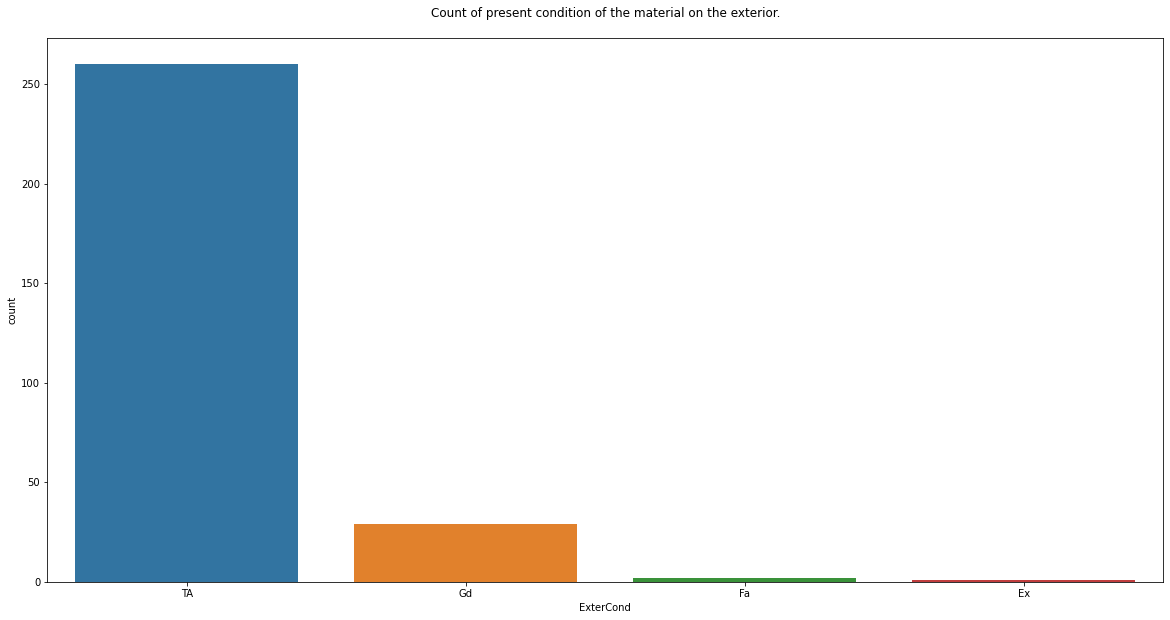

In [58]:

plt.figure(figsize=(20,10))
sns.countplot(df["ExterCond"])
plt.title("Count of present condition of the material on the exterior.\n ")
plt.show() 

#### Above countplot Evaluates the present condition of the material on the exterior is Average/Typical 

In [59]:
# extracting all the categorical columns
df_cat=df.select_dtypes(include=['object']).columns.tolist()
df_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [60]:
# changing the nominal value to integer for training model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['MSZoning','Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope','Neighborhood',
 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle','RoofMatl', 'Exterior1st','Exterior2nd',
 'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual', 'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
for val in df_cat:
    df[val]=le.fit_transform(df[val].astype(str))

In [61]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2,86.000000,14157,1,1,0,1,0,...,0,0,0,4,0,0,7,2007,5,2
1,1018,120,2,66.425101,5814,1,1,0,3,0,...,0,0,0,4,0,0,8,2009,0,0
2,929,20,2,66.425101,11838,1,1,3,3,0,...,0,0,0,4,0,0,6,2009,5,2
3,1148,70,2,75.000000,12000,1,1,3,0,0,...,0,0,0,4,0,0,7,2009,5,2
4,1227,60,2,86.000000,14598,1,1,0,3,0,...,0,0,0,4,0,0,1,2008,5,2


# Handling the outliers


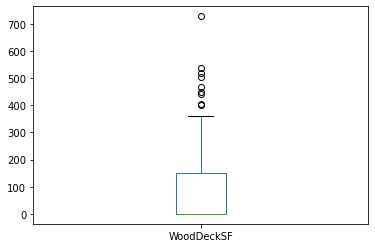

In [62]:
df["WoodDeckSF"].plot.box()

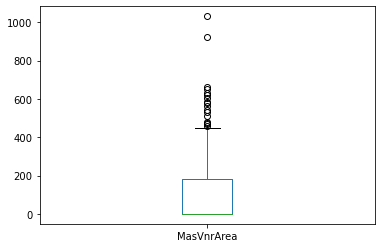

In [63]:
df["MasVnrArea"].plot.box()

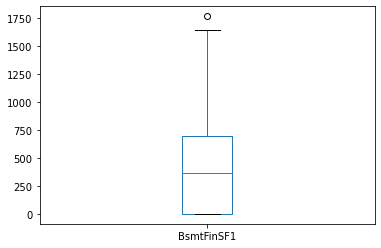

In [64]:
df["BsmtFinSF1"].plot.box()

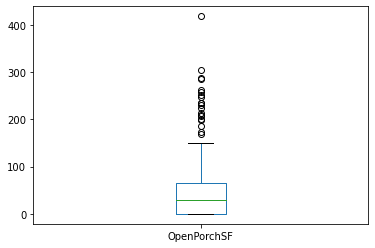

In [65]:
df["OpenPorchSF"].plot.box()

### As many type of dwelling may have lotarea, basementfin1 , alley area etc and many may not have . that may be making a huge difference in mean and median and 75% and max values . So, not removing the outliers

In [66]:
df.skew()

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -5.489874
SaleCondition    -2.161104
Length: 80, dtype: float64

In [67]:
from sklearn.preprocessing import power_transform

In [68]:
df=power_transform(df,method='yeo-johnson')

In [69]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=sc.fit_transform(df)
scaled_df.shape

(292, 80)

# All EDA and preprocessing has been done on test dataset. After data modelling done on Train dataset we will use this test dataset for prediction in the end at the time of conclusion

# EDA for train dataset

In [71]:
#importing train dataset
ds=pd.read_csv("housing_train.csv",sep='\t')
ds.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


# EDA for Train Data

In [72]:
ds.dtypes #checking the datatypes of variables

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [73]:
ds.columns # checking all the column names 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
ds.describe() # getting the description of the dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


key observations here

1. mean and median in  columns like LotArea , MasVnrArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal are hugely different.
2. There is big differnece in 75% and max values in WoodDeckSF,OpenPorchSF,EnclosedPorch, 3SsnPorch,ScreenPorch, MiscVal,BsmtFinSF1,MasVnrArea.
3. That means few outliers are there

In [75]:
ds.shape # checking no of columns and rows

(1168, 81)

In [76]:
ds.isnull().sum() # checking the null values 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

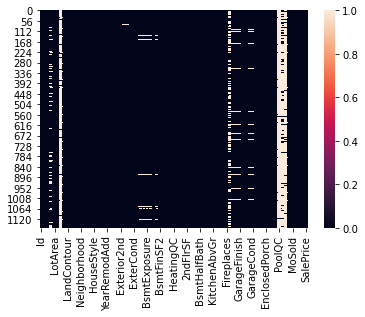

In [77]:
sns.heatmap(ds.isnull())

#### There are null values in variuos columns like fireplaces , garagefinish etc

In [78]:
dss=ds.columns[ds.isnull().any()] # extracting all the variables having null values 
dss

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

# Data cleaning process

1. dropping of column if having no positive correlation.

2. filling the null values in with suitable values .

3. change nominal values to numerical values.

4. After that, Removing of outliers if reqd.

In [79]:
ds.LotFrontage.unique()

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

#### replacing NaN value of LotFrontage with mean value

In [80]:
ds['LotFrontage'].fillna(value=ds['LotFrontage'].mean(), inplace=True)

In [81]:
ds.Alley.value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

#### replacing nan value with "No Alley Access"

In [82]:
ds['Alley'].fillna(value='No Alley Access', inplace=True)

In [83]:
ds.MasVnrType.unique()

array(['None', 'BrkFace', 'Stone', 'BrkCmn', nan], dtype=object)

#### replacing nan value with "None" value

In [84]:
ds['MasVnrType'].fillna(value='None', inplace=True)

In [85]:
ds.MasVnrArea.unique()

array([0.000e+00, 4.800e+02, 1.260e+02, 1.800e+02, 6.700e+01, 2.230e+02,
       6.600e+01, 8.200e+01, 1.740e+02, 3.040e+02, 1.720e+02, 1.660e+02,
       1.840e+02, 3.500e+02, 4.120e+02, 1.000e+00, 1.890e+02, 1.120e+02,
       5.000e+01, 2.200e+02, 1.600e+01, 6.300e+02, 2.810e+02, 2.870e+02,
       3.400e+02, 2.160e+02,       nan, 1.400e+02, 1.830e+02, 3.360e+02,
       3.960e+02, 2.320e+02, 3.200e+02, 8.500e+01, 1.620e+02, 1.540e+02,
       1.760e+02, 1.200e+02, 1.080e+02, 2.520e+02, 1.300e+02, 3.510e+02,
       5.710e+02, 5.300e+01, 2.040e+02, 9.750e+02, 6.530e+02, 8.000e+01,
       4.720e+02, 3.400e+01, 1.650e+02, 2.370e+02, 1.130e+02, 9.000e+01,
       1.600e+02, 1.470e+02, 1.360e+02, 3.760e+02, 8.900e+01, 4.150e+02,
       2.000e+02, 5.060e+02, 2.860e+02, 4.500e+01, 2.450e+02, 2.470e+02,
       2.400e+02, 7.000e+01, 9.800e+01, 6.040e+02, 8.600e+02, 2.700e+01,
       1.530e+02, 2.120e+02, 2.060e+02, 7.600e+02, 2.960e+02, 5.280e+02,
       2.990e+02, 3.380e+02, 1.230e+02, 2.330e+02, 

#### replacing the nan with '0'

In [86]:
ds['MasVnrArea'].fillna(value=0, inplace=True)

In [87]:
ds.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

#### replacing nan value with No basement

In [88]:
ds['BsmtQual'].fillna(value='No basement', inplace=True)

In [89]:
ds.BsmtCond.unique()

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

#### replacing the nan with "No basement"

In [90]:
ds['BsmtCond'].fillna(value='No basement', inplace=True)

In [91]:
ds.BsmtExposure.unique()

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

#### replacing the nan with "No basement"

In [92]:
ds['BsmtExposure'].fillna(value='No basement', inplace=True)

In [93]:
ds.BsmtFinType1.unique()

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

#### replacing the nan with "No basement"

In [94]:
ds['BsmtFinType1'].fillna(value='No basement', inplace=True)

In [95]:
ds.BsmtFinType2.unique()

array(['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'], dtype=object)

#### replacing the nan with "No basement"

In [96]:
ds['BsmtFinType2'].fillna(value='No basement', inplace=True)

In [97]:
ds.FireplaceQu.unique()

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

#### replacing the nan with "No Fireplace"

In [98]:
ds['FireplaceQu'].fillna(value='No Fireplace', inplace=True)

In [99]:
ds.GarageType.unique()

array(['Attchd', 'BuiltIn', 'Detchd', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

#### replacing the nan with "No Garage"

In [100]:
ds['GarageType'].fillna(value='No Garage', inplace=True)

In [101]:
ds.GarageYrBlt.unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948.,   nan,
       1964., 1920., 1930., 1968., 1946., 1992., 1936., 1967., 1989.,
       1959., 1966., 1916., 1941., 1998., 1962., 1926., 1925., 1983.,
       1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945., 1995.,
       1981., 1994., 1949., 1996., 1921., 1963., 1938., 1958., 1935.,
       1940., 1990., 1910., 1954., 1927., 2009., 1986., 1929., 1984.,
       1973., 1924., 1942., 1900., 1931., 1951., 1934., 1972., 1932.,
       1928., 1918., 1908., 1933., 1906., 1914., 1952., 1915.])

#### replacing the nan values with median

In [102]:
ds['GarageYrBlt'].fillna(value=ds['GarageYrBlt'].median(), inplace=True)

In [103]:
ds.GarageQual.unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

#### replacing the nan values with "No Garage"

In [104]:
ds['GarageQual'].fillna(value='No Garage', inplace=True)

In [105]:
ds.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

#### replacing the nan values with "No Garage"

In [106]:
ds['GarageFinish'].fillna(value='No Garage', inplace=True)

In [107]:
ds.GarageCond.unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

#### replacing the nan values with "No Garage"

In [108]:
ds.PoolQC.unique()

array([nan, 'Ex', 'Gd', 'Fa'], dtype=object)

#### replacing the nan values with "No Pool"

In [109]:
ds['PoolQC'].fillna(value='No Pool', inplace=True)

In [110]:
ds.Fence.unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

#### replacing the nan values with "No Fence"

In [111]:
ds['Fence'].fillna(value='No Fence', inplace=True)

In [112]:
ds.MiscFeature.unique()

array([nan, 'Shed', 'Gar2', 'TenC', 'Othr'], dtype=object)

#### replacing the nan values with "None"

In [113]:
ds['MiscFeature'].fillna(value='None', inplace=True)

In [114]:
dscor=ds.corr()
dscor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.005969,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.061397,0.003868,...,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.336681,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.028215,-0.052236,...,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.005969,-0.336681,1.000000,0.299452,0.229218,-0.047573,0.112655,0.088799,0.188108,0.228996,...,0.088334,0.151328,0.020902,0.051084,0.030405,0.196001,-0.001329,0.022517,-0.003885,0.323779
LotArea,-0.029212,-0.124151,0.299452,1.000000,0.107188,0.017513,0.005506,0.027228,0.120192,0.221851,...,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.229218,0.107188,1.000000,-0.083167,0.575800,0.555945,0.403985,0.219643,...,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.047573,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.135133,-0.028810,...,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.112655,0.005506,0.575800,-0.377731,1.000000,0.592829,0.318562,0.227933,...,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.088799,0.027228,0.555945,0.080669,0.592829,1.000000,0.178583,0.114430,...,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.061397,0.028215,0.188108,0.120192,0.403985,-0.135133,0.318562,0.178583,1.000000,0.263377,...,0.152083,0.127876,-0.102142,0.019123,0.047375,0.013836,-0.027263,0.012707,-0.013220,0.460535
BsmtFinSF1,0.003868,-0.052236,0.228996,0.221851,0.219643,-0.028810,0.227933,0.114430,0.263377,1.000000,...,0.192939,0.108802,-0.082351,0.025485,0.033490,0.154769,0.008314,0.007482,0.005614,0.362874


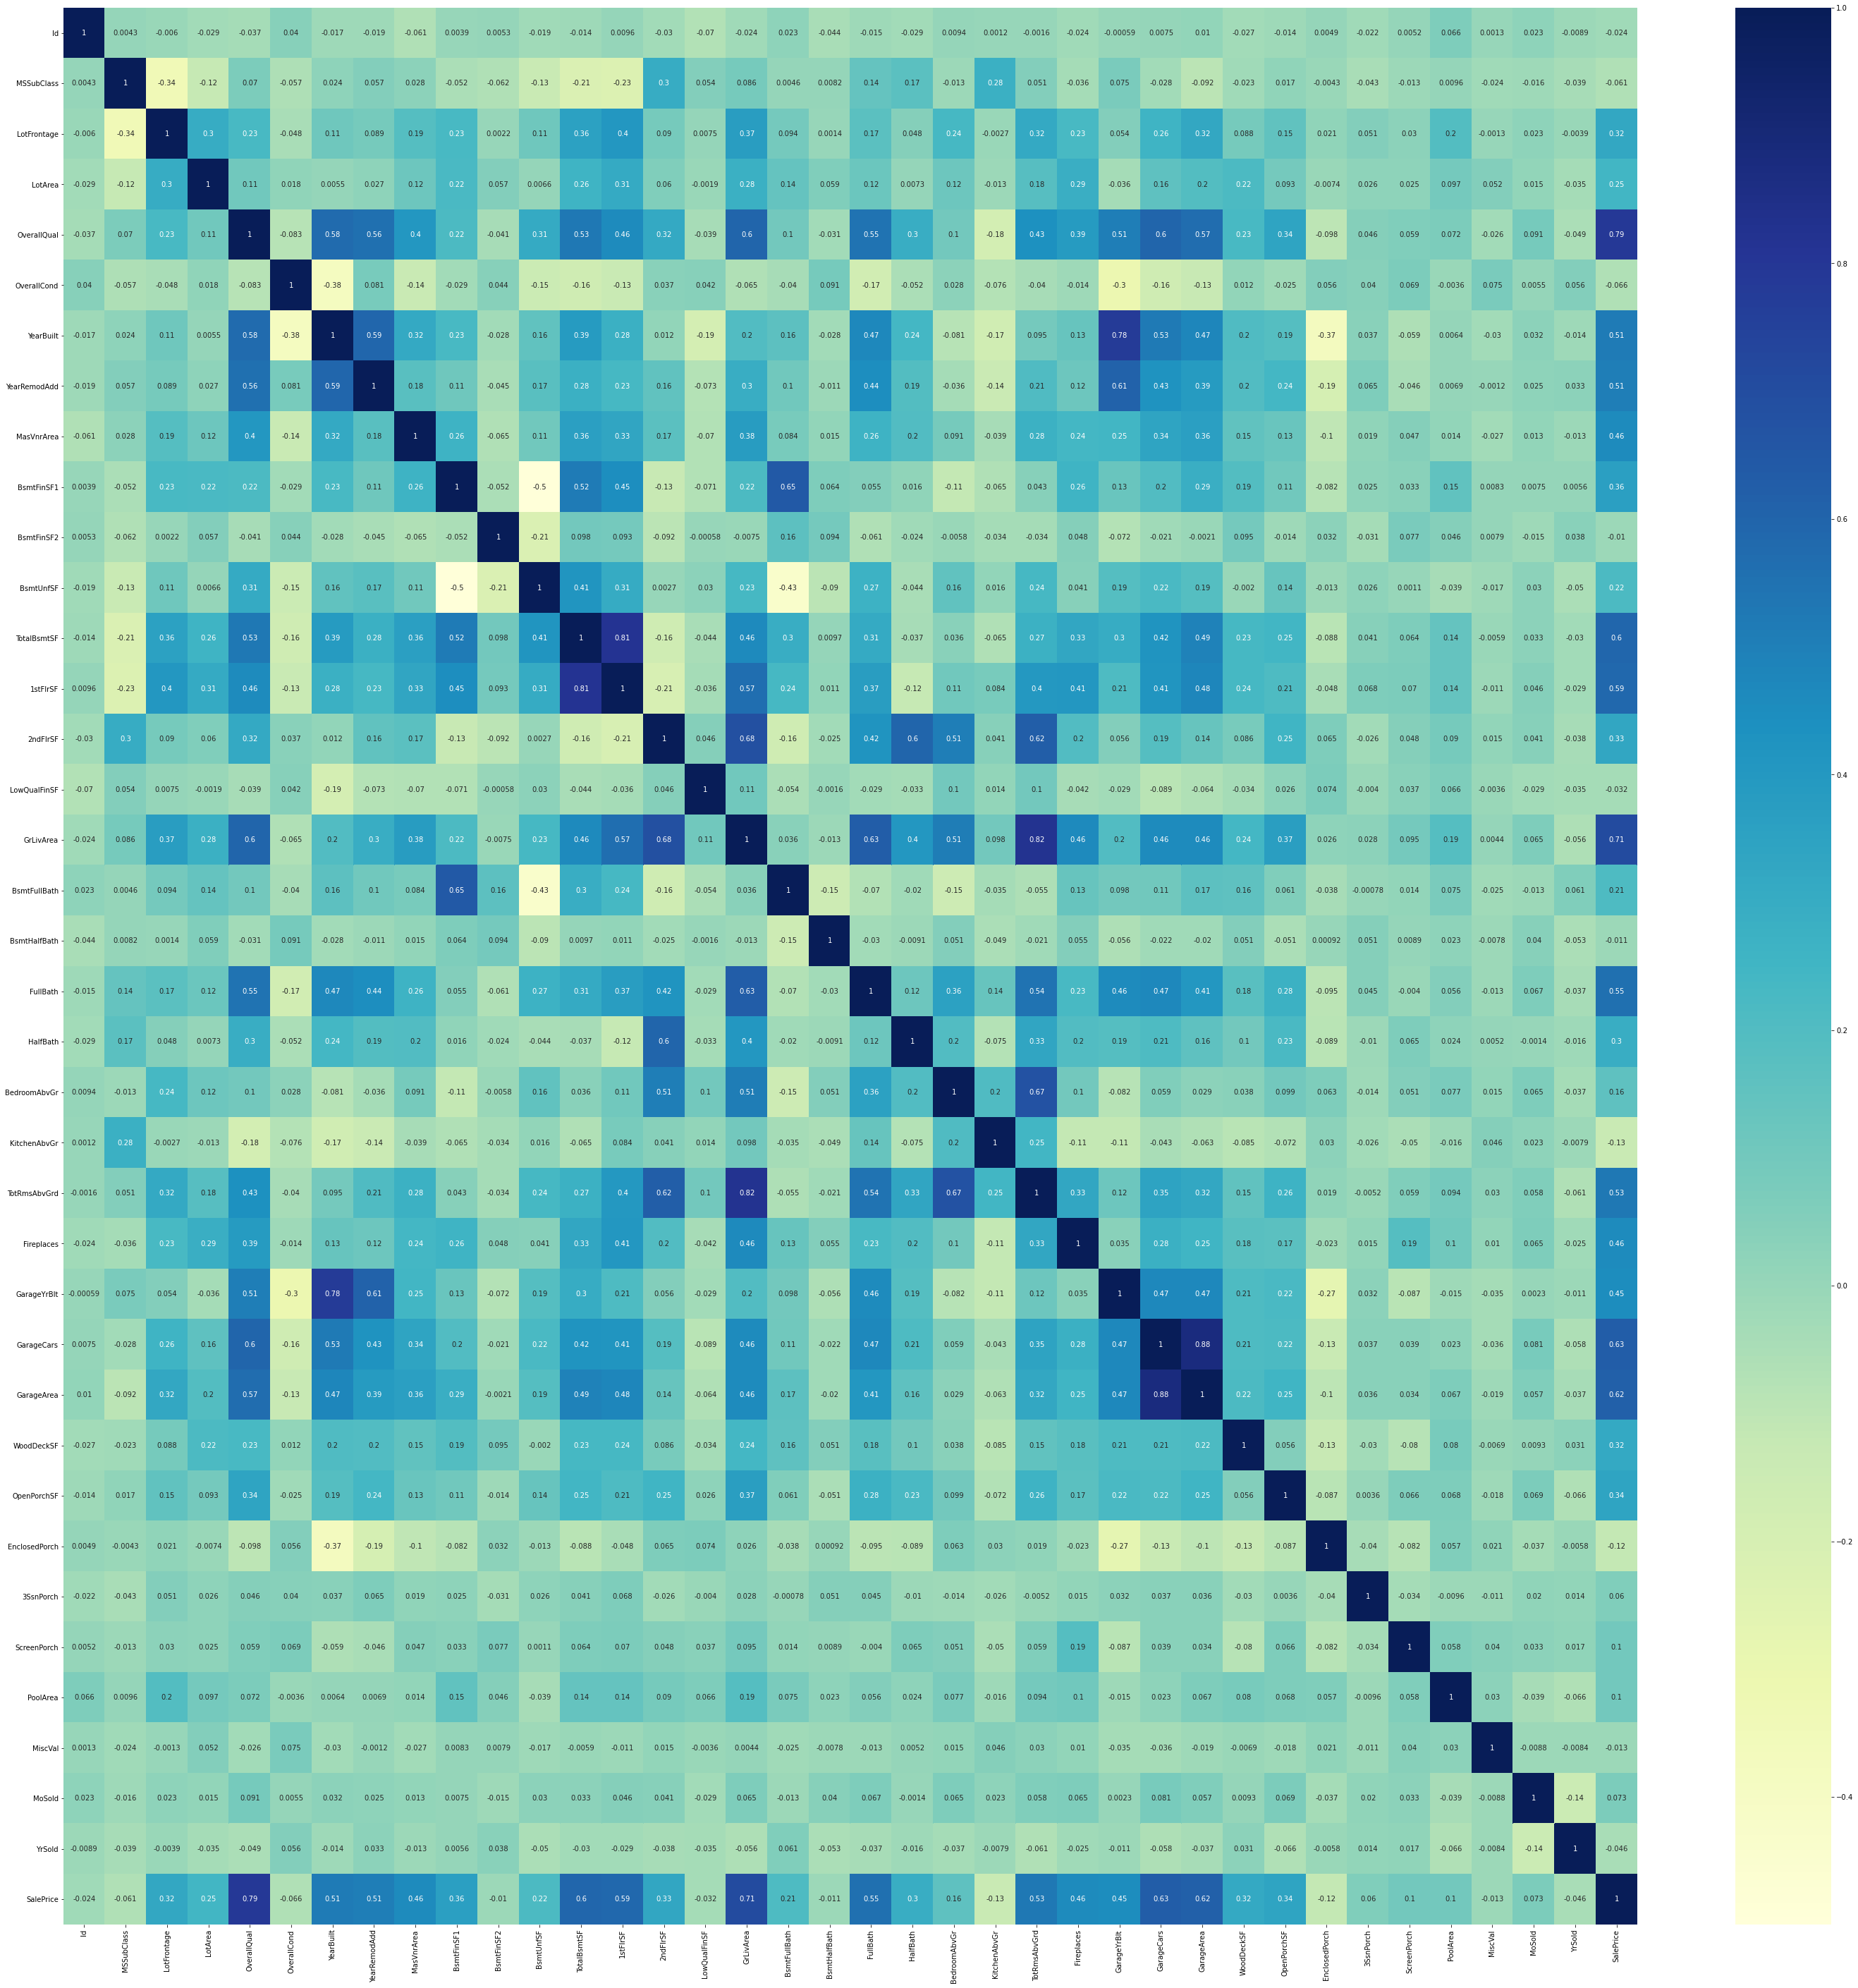

In [115]:
plt.figure(figsize=(50,50)) 
sns.heatmap(ds.corr(),annot=True,cmap='YlGnBu')

### key observations here
1. OverallQual is highly correlated with target variable ActualPrice.
2. Garagecars,GarageArea are highly correlated with each other.
3. GarageCars,garagearea,TotalBsmtSF, 1FirSF are highly correlated with target variable ActualPrice.


In [116]:
# checking for the count of unique values in each column
for i in ds.columns:
    print("Count of unique values of  ", i, "is " , ds[i].nunique())

Count of unique values of   Id is  1168
Count of unique values of   MSSubClass is  15
Count of unique values of   MSZoning is  5
Count of unique values of   LotFrontage is  107
Count of unique values of   LotArea is  892
Count of unique values of   Street is  2
Count of unique values of   Alley is  3
Count of unique values of   LotShape is  4
Count of unique values of   LandContour is  4
Count of unique values of   Utilities is  1
Count of unique values of   LotConfig is  5
Count of unique values of   LandSlope is  3
Count of unique values of   Neighborhood is  25
Count of unique values of   Condition1 is  9
Count of unique values of   Condition2 is  8
Count of unique values of   BldgType is  5
Count of unique values of   HouseStyle is  8
Count of unique values of   OverallQual is  10
Count of unique values of   OverallCond is  9
Count of unique values of   YearBuilt is  110
Count of unique values of   YearRemodAdd is  61
Count of unique values of   RoofStyle is  6
Count of unique valu

In [117]:
#univariate analysis

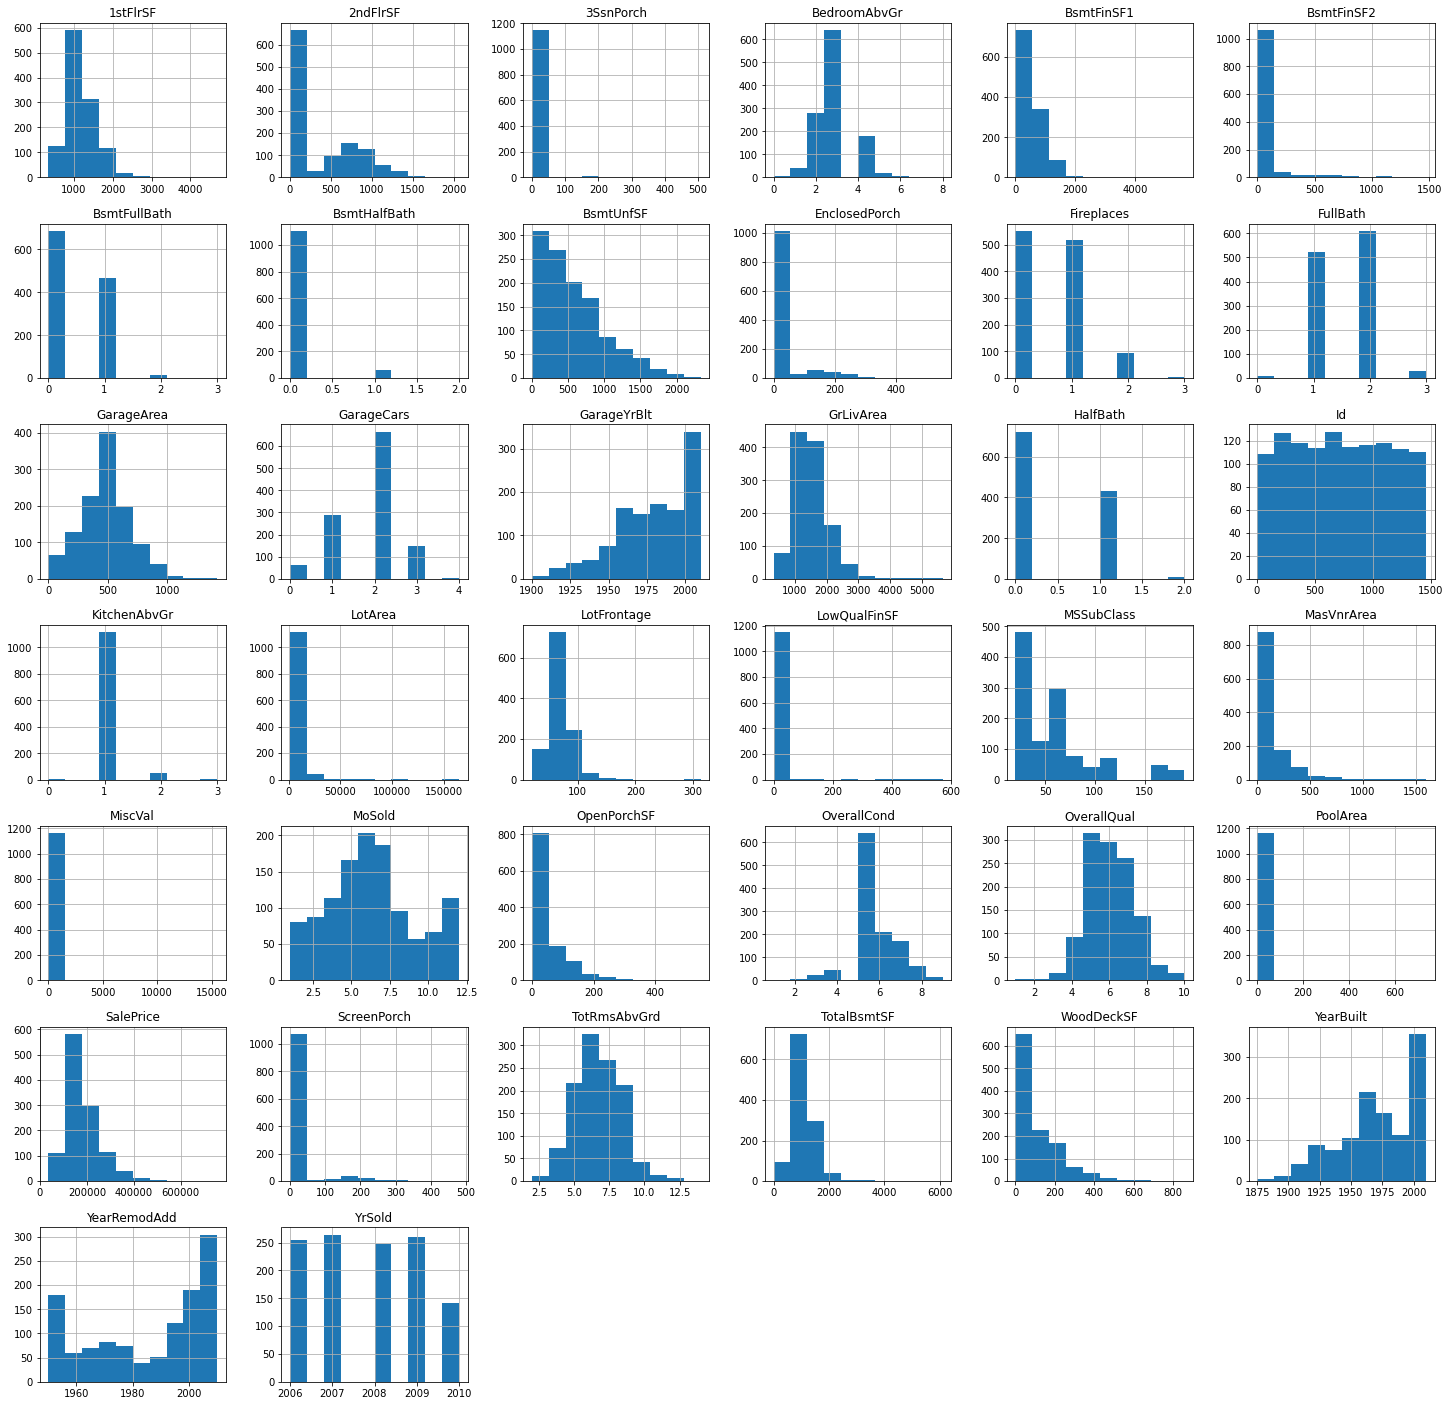

In [118]:
ds.hist(figsize=(25,25))
plt.show()

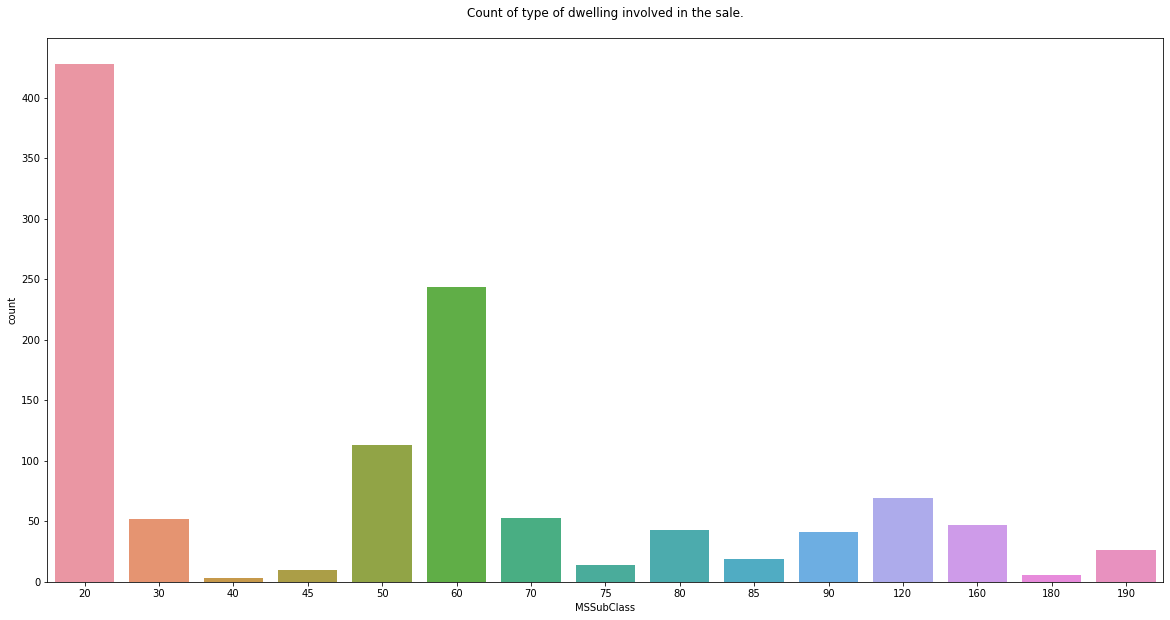

In [119]:
plt.figure(figsize=(20,10))
sns.countplot(ds["MSSubClass"])
plt.title("Count of type of dwelling involved in the sale.\n ")
plt.show() 

#### Above countplot shows that 
1. 1-STORY 1946 & NEWER ALL STYLES are maximum which are in sale.
2. 1-STORY W/FINISHED ATTIC ALL AGES is least one which is in sale.

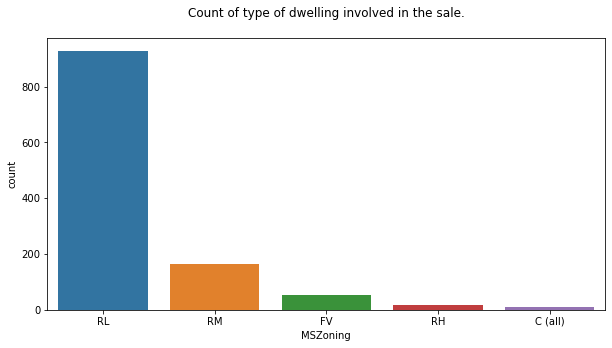

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(ds["MSZoning"])
plt.title("Count of type of dwelling involved in the sale.\n ")
plt.show() 

#### Above countplot shows that Residential Low Density property is maximum on sale. and Commercial is least on sale.

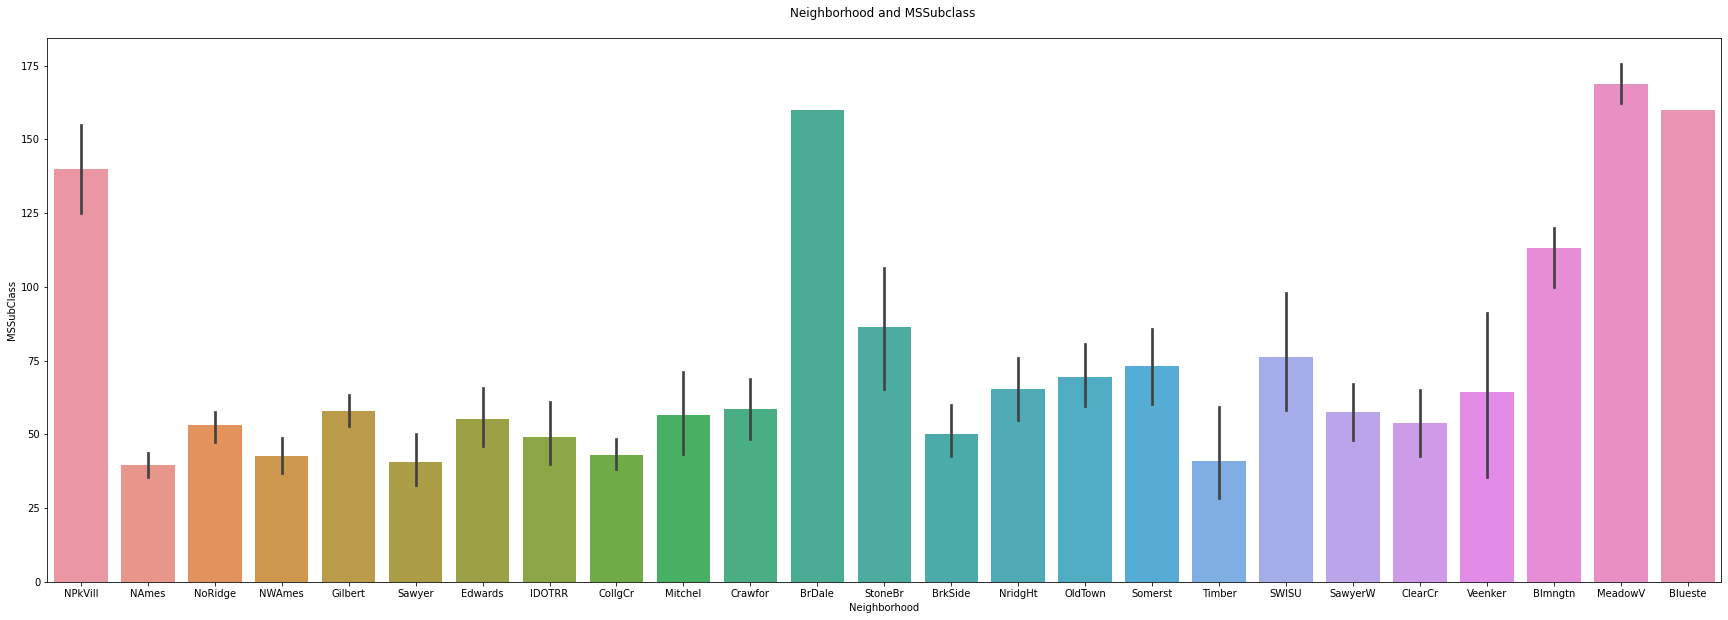

In [121]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Neighborhood',y='MSSubClass',data=ds)
plt.title("Neighborhood and MSSubclass \n")
plt.show()

#### above barplot shows the neighbourhood of all MSSubclass dwelling involved in sale. like "Meadow Village" is in neighbourhood of "2-STORY PUD - 1946 & NEWER"

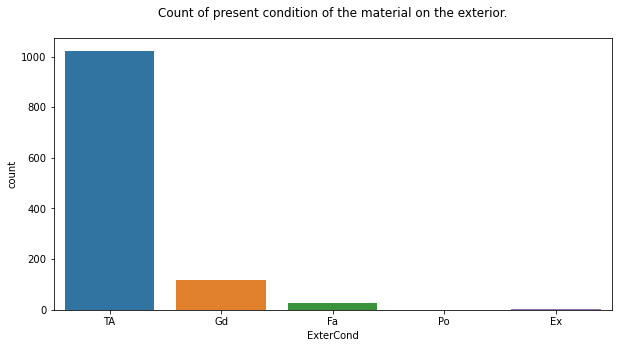

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(ds["ExterCond"])
plt.title("Count of present condition of the material on the exterior.\n ")
plt.show() 

#### Above countplot Evaluates the present condition of the material on the exterior is Average/Typical 

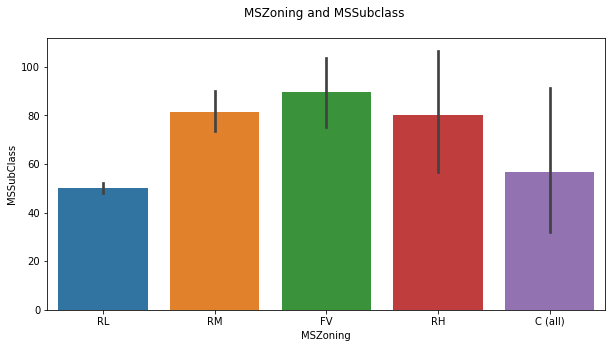

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(x='MSZoning',y='MSSubClass',data=ds)
plt.title("MSZoning and MSSubclass \n")
plt.show()

#### Above countplot shows Maximum dwelling involved in sale are "DUPLEX - ALL STYLES AND AGES" having general zoning classification as "Floating Village Residential"

Text(0.5, 1.0, 'Sale Price of Dwelling having MSSubClass=90  \n DUPLEX - ALL STYLES AND AGES')

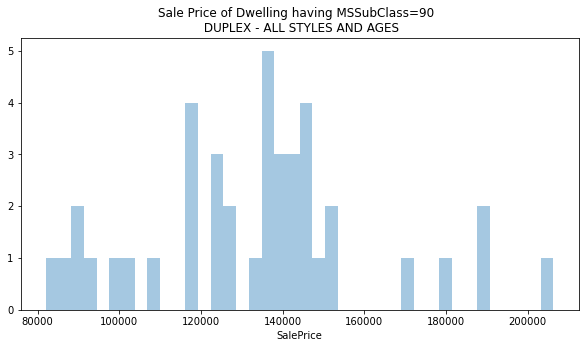

In [124]:
plt.figure(figsize=(10,5))
sns.distplot(ds[ds['MSSubClass']==90]['SalePrice'],kde=False,bins=40)
plt.title('Sale Price of Dwelling having MSSubClass=90  \n DUPLEX - ALL STYLES AND AGES')

#### Above distplot shows the saleprice of dwelling where MSSubClass=90 i.e DUPLEX - ALL STYLES AND AGES

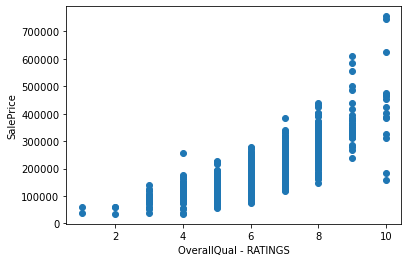

In [125]:
plt.scatter(ds["OverallQual"],ds["SalePrice"])
plt.xlabel("OverallQual - RATINGS")
plt.ylabel("SalePrice")
plt.show()

### Above scatterplot shows that Highest rating have highest prices

In [126]:
# extracting all the categorical columns
ds_cat=ds.select_dtypes(include=['object']).columns.tolist()
ds_cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Label Encoding

In [127]:
# changing the nominal value to integer for training model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['MSZoning','Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood','Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle','RoofMatl', 
       'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
       'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
       'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
       'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
for val in ds_cat:
    ds[val]=le.fit_transform(ds[val].astype(str))

In [128]:
ds.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3,70.98847,4928,1,1,0,3,0,...,0,3,4,1,0,2,2007,8,4,128000
1,889,20,3,95.00000,15865,1,1,0,3,0,...,0,3,4,1,0,10,2007,8,4,268000
2,793,60,3,92.00000,9920,1,1,0,3,0,...,0,3,4,1,0,6,2007,8,4,269790
3,110,20,3,105.00000,11751,1,1,0,3,0,...,0,3,2,1,0,1,2010,0,4,190000
4,422,20,3,70.98847,16635,1,1,0,3,0,...,0,3,4,1,0,6,2009,8,4,215000


# Handling the outliers¶

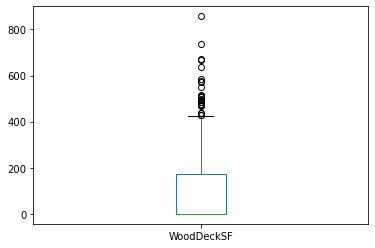

In [129]:
ds["WoodDeckSF"].plot.box()

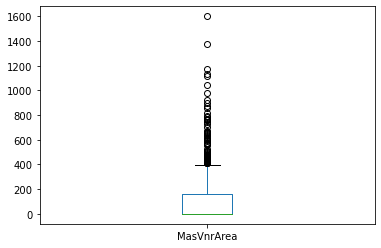

In [130]:
ds["MasVnrArea"].plot.box()

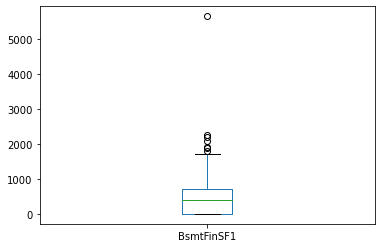

In [131]:
ds["BsmtFinSF1"].plot.box()

In [132]:
from scipy.stats import zscore

In [133]:
z=np.abs(zscore(ds))
z

array([[1.43548658, 1.50830058, 0.02164599, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.39632483, 0.87704243, 0.02164599, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.16554544, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [1.26961389, 2.46243779, 0.02164599, ..., 0.33003329, 0.20793187,
        0.41705186],
       [1.66626597, 0.31562908, 4.76211672, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.25755011, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        0.02179027]])

### As many type of dwelling may have lotarea, basementfin1 , alley area etc and many may not have . that may be making a huge difference in mean and median and 75% and max values . So, not removing the outliers

In [134]:
ds.skew() # checking if the data is skewed

Id                0.026526
MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
Length: 81, dtype: float64

#### little skewness is there so we will remove it

In [135]:
# seperatng the target variable
ds_x=ds.drop(columns=['SalePrice'])
y_t=pd.DataFrame(ds['SalePrice'])
print(ds_x.shape, y_t.shape)

(1168, 80) (1168, 1)


In [136]:
from sklearn.preprocessing import power_transform

In [137]:
ds_x=power_transform(ds_x,method='yeo-johnson')

#### scaling the dataset

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(ds_x)
scaledX.shape

(1168, 80)

### Data Modelling

In [140]:
# importing our libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### finding the best random state

In [142]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=r2_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 86.00361454154653 Random state 148


#### using the best random state

In [143]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=148)

In [144]:
x_train.shape , x_test.shape

((911, 80), (257, 80))

In [145]:
y_train.shape , y_test.shape

((911, 1), (257, 1))

# Finding the best model


In [146]:
#using algorithms in for loops
model=[LinearRegression(),Lasso(),Ridge(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
    print(m , "\nAccuracy Score of " ,r2score*100, "Cross Val Score", {cvscore*100})
    print("**********************************************************************\n")

LinearRegression() 
Accuracy Score of  86.00361454154653 Cross Val Score {67.181131669369}
**********************************************************************

Lasso() 
Accuracy Score of  86.00664904863633 Cross Val Score {67.181131669369}
**********************************************************************

Ridge() 
Accuracy Score of  86.00405781614823 Cross Val Score {67.181131669369}
**********************************************************************

RandomForestRegressor() 
Accuracy Score of  90.52695522525539 Cross Val Score {67.181131669369}
**********************************************************************

KNeighborsRegressor() 
Accuracy Score of  78.47326833612966 Cross Val Score {67.181131669369}
**********************************************************************

GradientBoostingRegressor() 
Accuracy Score of  91.75984135728993 Cross Val Score {67.181131669369}
**********************************************************************

AdaBoostRegressor() 
Accura

#### Hyperparameter Tuning

In [147]:
# GradientBoostingRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [148]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(GBR,x_train,y_train,cv=5).mean()
print( "\nAccuracy Score of ",GBR ,"is",r2score*100,"and", "Cross Val Score is", {cvscore*100})
print("*****************************************************************************************\n")
search_grid={'n_estimators':[5, 6, 7, 8, 9, 10, 11, 12, 13, 15],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)


Accuracy Score of  GradientBoostingRegressor() is 91.8665169406879 and Cross Val Score is {70.27779002873817}
*****************************************************************************************



In [149]:
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 15}

# Conclusion

GradientBoostingRegressor() is best performing model with r2score 91.88% and cross validation score with minimum distance of 70

# Saving the model- Serialization

In [150]:
# saving the prediction model

import pickle
filename="Housingprice.pkl"
pickle.dump(GBR,open(filename,'wb'))

In [151]:
# load the model
fitted_model=pickle.load(open("Housingprice.pkl",'rb'))

In [152]:
fitted_model

GradientBoostingRegressor()

In [153]:
# predictions over test data (houseprice_test.csv)
predictions=fitted_model.predict(scaled_df)

In [154]:
predictions=predictions.astype(int)

In [155]:
ds_pred=pd.DataFrame(data=predictions,columns=['SalePrice'])
ds_pred

,SalePrice
0,355590
1,212453
2,231748
3,188676
4,218146
...,...
287,246127
288,141279
289,157507
290,156571
